In [75]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, correlate
from scipy.linalg import toeplitz  # Corrigido para importar toeplitz de scipy.linalg

# Carregar os dados
t = loadmat("sismograma.mat")["sismograma"].flatten()
r_true = loadmat("refletividade.mat")["refletividade"].flatten()

In [29]:
import numpy as np

def levinson_durbin(r, p):
    """
    Implementa o algoritmo de Levinson-Durbin.

    Parâmetros:
    r : np.ndarray
        Vetor de autocorrelação.
    p : int
        Número de coeficientes AR desejados.

    Retorna:
    a : np.ndarray
        Coeficientes do modelo AR.
    """
    # Inicializa os coeficientes AR
    a = np.zeros(p)
    # Inicializa o erro de predição
    e = r[0]

    for k in range(p):
        # Calcular a soma da autocorrelação
        alpha = r[k + 1]
        for j in range(k):
            alpha -= a[j] * r[k - j]
        
        # Calcular o ganho
        kappa = alpha / e
        
        # Atualizar os coeficientes
        a[k] = kappa
        for j in range(k):
            a[j] += kappa * a[k - j - 1]
        
        # Atualizar o erro de predição
        e *= (1 - kappa ** 2)
    # Normalização dos coeficientes
    norm = np.sqrt(np.sum(a**2))
    if norm > 0:  # Evitar divisão por zero
        a /= norm
    
    return a

filter_order = 100
autocorr_t = correlate(t, t, mode='full')
w = levinson_durbin(autocorr_t, filter_order)

r_estimated = np.convolve(t, w, mode='same')  # mode='same' para manter o tamanho do vetor

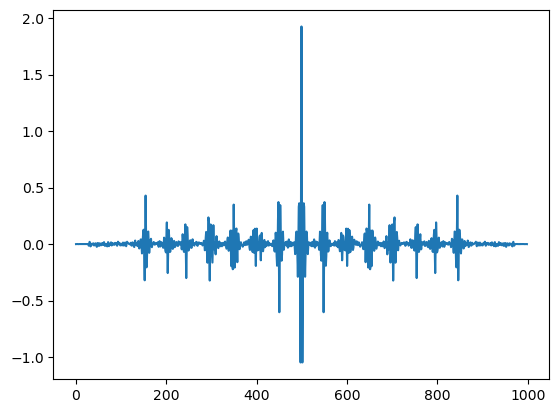

In [30]:
plt.plot(autocorr_t)

In [31]:
autocorr_r_estimates = correlate(r_estimated, r_estimated, mode="full")
autocorr_r_true = correlate(r_true, r_true, mode="full")

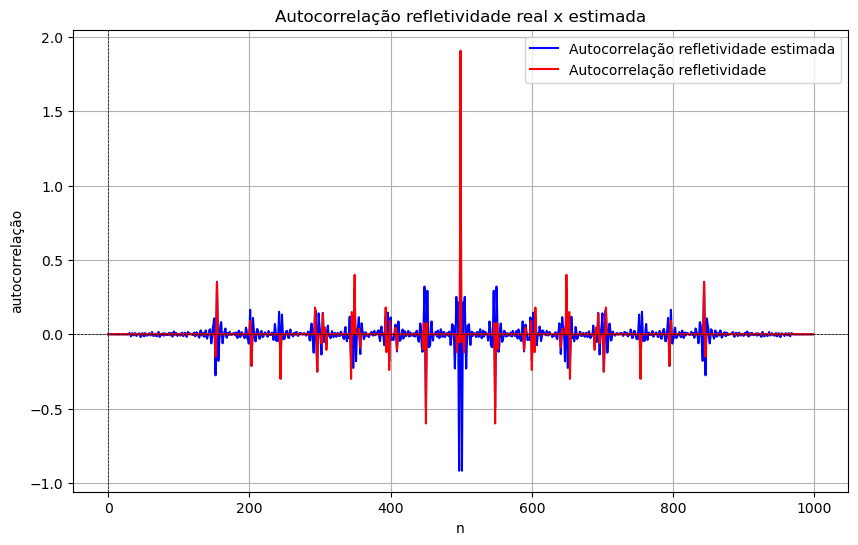

In [32]:
# Criando o gráfico
plt.figure(figsize=(10, 6))   # Tamanho da figura
plt.plot(range(len(autocorr_r_estimates)), autocorr_r_estimates, label='Autocorrelação refletividade estimada', color='blue')  # Plotando o primeiro array
plt.plot(range(len(autocorr_r_true)), autocorr_r_true, label='Autocorrelação refletividade', color='red')   # Plotando o segundo array

# Adicionando título e rótulos
plt.title('Autocorrelação refletividade real x estimada')
plt.xlabel('n')
plt.ylabel('autocorrelação')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linha horizontal no zero
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linha vertical no zero
plt.grid()  # Grade no gráfico
plt.legend()  # Legenda
plt.show()  # Mostrando o gráfico

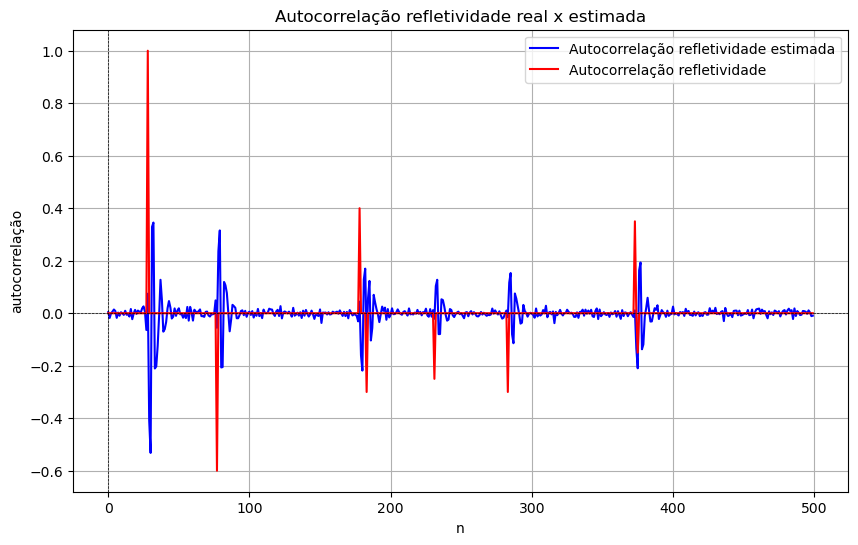

In [33]:
# Criando o gráfico
plt.figure(figsize=(10, 6))   # Tamanho da figura
plt.plot(range(len(r_estimated)), r_estimated, label='Autocorrelação refletividade estimada', color='blue')  # Plotando o primeiro array
plt.plot(range(len(r_true)), r_true, label='Autocorrelação refletividade', color='red')   # Plotando o segundo array

# Adicionando título e rótulos
plt.title('Autocorrelação refletividade real x estimada')
plt.xlabel('n')
plt.ylabel('autocorrelação')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linha horizontal no zero
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linha vertical no zero
plt.grid()  # Grade no gráfico
plt.legend()  # Legenda
plt.show()  # Mostrando o gráfico

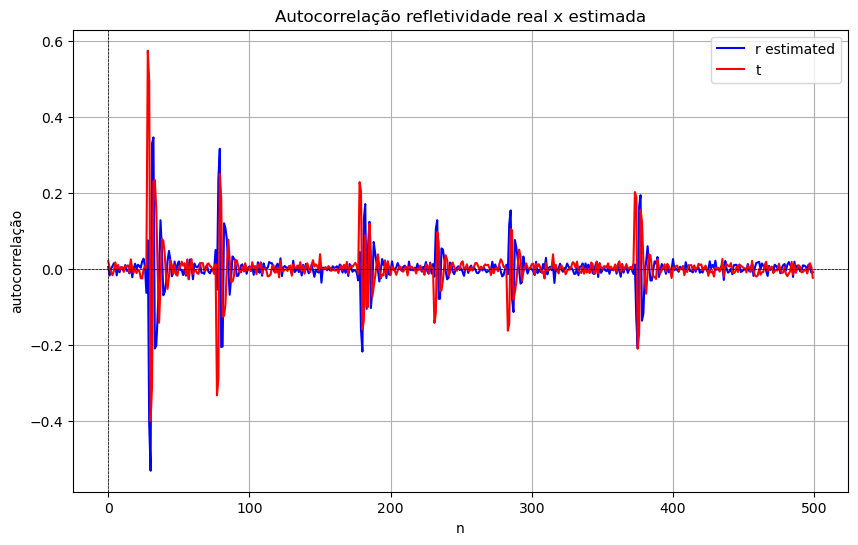

In [34]:
# Criando o gráfico
plt.figure(figsize=(10, 6))   # Tamanho da figura
plt.plot(range(len(r_estimated)), r_estimated, label='r estimated', color='blue')  # Plotando o primeiro array
plt.plot(range(len(t)), t, label='t', color='red')   # Plotando o segundo array

# Adicionando título e rótulos
plt.title('Autocorrelação refletividade real x estimada')
plt.xlabel('n')
plt.ylabel('autocorrelação')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linha horizontal no zero
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linha vertical no zero
plt.grid()  # Grade no gráfico
plt.legend()  # Legenda
plt.show()  # Mostrando o gráfico

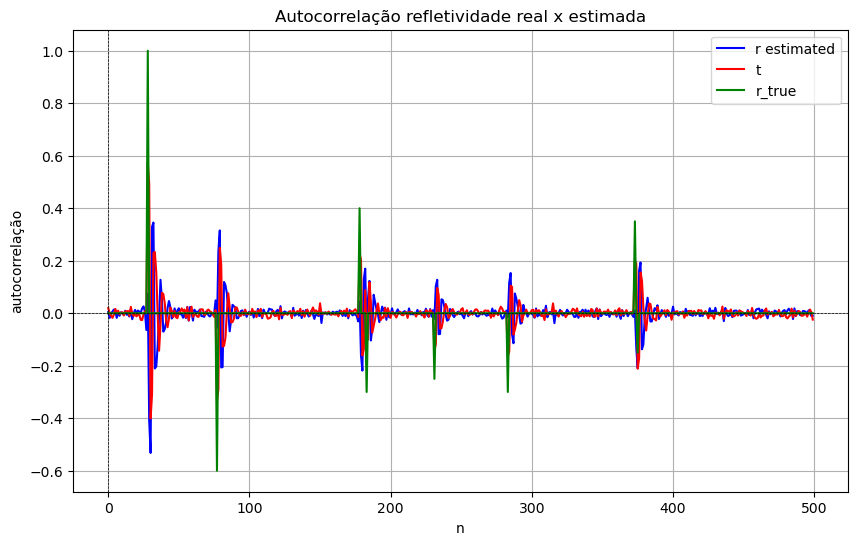

In [36]:
# Criando o gráfico
plt.figure(figsize=(10, 6))   # Tamanho da figura
plt.plot(range(len(r_estimated)), r_estimated, label='r estimated', color='blue')  # Plotando o primeiro array
plt.plot(range(len(t)), t, label='t', color='red')   # Plotando o segundo array
plt.plot(range(len(r_true)), r_true, label='r_true', color='green')   # Plotando o segundo array


# Adicionando título e rótulos
plt.title('Autocorrelação refletividade real x estimada')
plt.xlabel('n')
plt.ylabel('autocorrelação')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linha horizontal no zero
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linha vertical no zero
plt.grid()  # Grade no gráfico
plt.legend()  # Legenda
plt.show()  # Mostrando o gráfico

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_fep_otimo(sinal, num_coeficientes):
    """
    Calcula os coeficientes do Filtro de Estimação de Parâmetros (FEP) ótimo.
    
    :param sinal: O sinal de entrada (numpy array).
    :param num_coeficientes: O número de coeficientes desejados para o filtro.
    :return: Os coeficientes do FEP.
    """
    sinal = np.asarray(sinal)
    R = np.correlate(sinal, sinal, mode='full')
    R = R[len(R)//2:]  # Parte positiva da autocovariância
    
    # Monta a matriz R e o vetor r
    R_matrix = np.zeros((num_coeficientes, num_coeficientes))
    for i in range(num_coeficientes):
        for j in range(num_coeficientes):
            R_matrix[i, j] = R[abs(i - j)]
    
    r = np.zeros(num_coeficientes)
    for i in range(num_coeficientes):
        r[i] = R[i + 1]  # R[0] é a variância do sinal
    
    # Calcula os coeficientes ótimos
    coeficientes = np.linalg.solve(R_matrix, r)
    return coeficientes

def aplicar_fep(sinal, coeficientes):
    """
    Aplica o Filtro de Estimação de Parâmetros (FEP) ao sinal usando coeficientes ótimos.
    
    :param sinal: O sinal de entrada (numpy array).
    :param coeficientes: Coeficientes do filtro (numpy array).
    :return: Sinal filtrado e erro de predição.
    """
    num_coeficientes = len(coeficientes)
    preditor = np.zeros(len(sinal))
    erro = np.zeros(len(sinal))
    
    # Aplicando o filtro
    for n in range(num_coeficientes, len(sinal)):
        # Certifique-se de pegar exatamente num_coeficientes amostras anteriores
        preditor[n] = np.dot(coeficientes, sinal[n-num_coeficientes:n][::-1])
        erro[n] = sinal[n] - preditor[n]
    
    return preditor, erro

t = loadmat("sismograma.mat")["sismograma"].flatten()
r_true = loadmat("refletividade.mat")["refletividade"].flatten()

# Parâmetros
error_for_k = {}
mse_for_k = {}

for k in range(1, 20):
    sinal = t.flatten()
    coeficientes = calcular_fep_otimo(sinal, k)
    preditor, erro = aplicar_fep(sinal, coeficientes)
    error_for_k[str(k)] = erro
    mse_for_k[str(k)] = np.mean(erro ** 2)


Text(0.5, 1.0, 'Erro Quadrático Médio vs. Número de Coeficientes (K)')

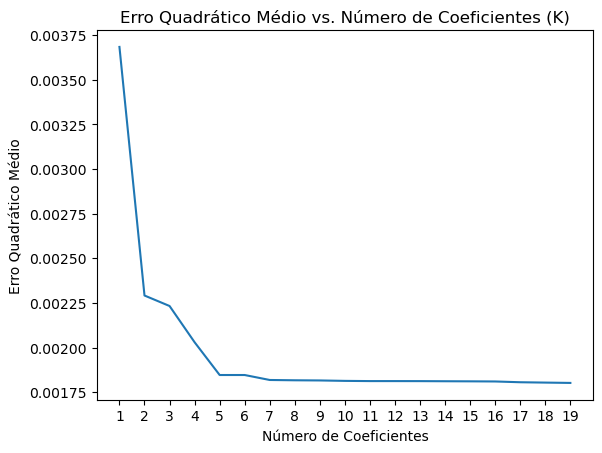

In [62]:
# for k, e in error_for_k.items():
#     plt.plot(range(len(e)), e, label="refletividade estimada", color="red")
#     plt.plot(range(len(r_true)), r_true, label="refletividade real", color="blue")
#     plt.title(f"Filtro de Erro de Predição com {k} coeficientes")
#     plt.show()

x = mse_for_k.keys()
y = mse_for_k.values()

plt.plot(x, y)
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Número de Coeficientes')
plt.title("Erro Quadrático Médio vs. Número de Coeficientes (K)")

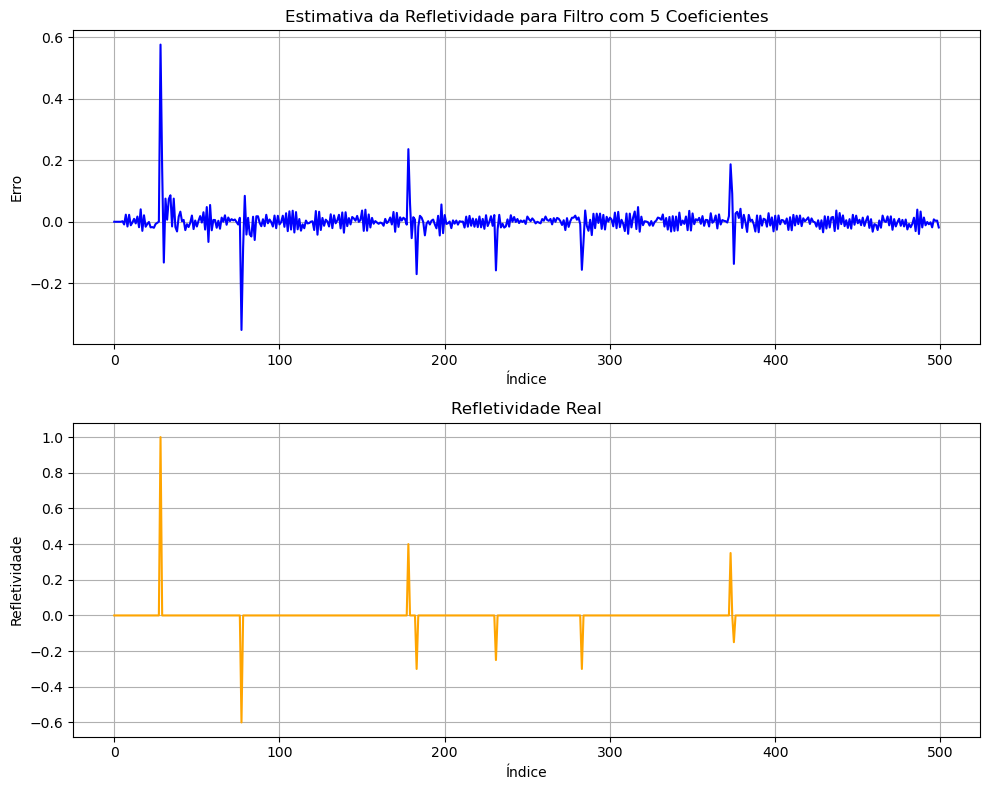

In [69]:
import matplotlib.pyplot as plt

# Criando a figura e os eixos para os subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 linhas, 1 coluna

# Primeiro subplot: Estimativa da Refletividade para Filtro com 5 Coeficientes
axs[0].plot(error_for_k["5"], color='blue')  # Plota o erro
axs[0].set_title("Estimativa da Refletividade para Filtro com 5 Coeficientes")
axs[0].set_xlabel("Índice")
axs[0].set_ylabel("Erro")
axs[0].grid()

# Segundo subplot: Refletividade Real
axs[1].plot(r_true, color='orange')  # Plota a refletividade real
axs[1].set_title("Refletividade Real")
axs[1].set_xlabel("Índice")
axs[1].set_ylabel("Refletividade")
axs[1].grid()

# Ajustando o layout para não sobrepor os subplots
plt.tight_layout()

# Exibindo o gráfico com ambos os subplots
plt.show()


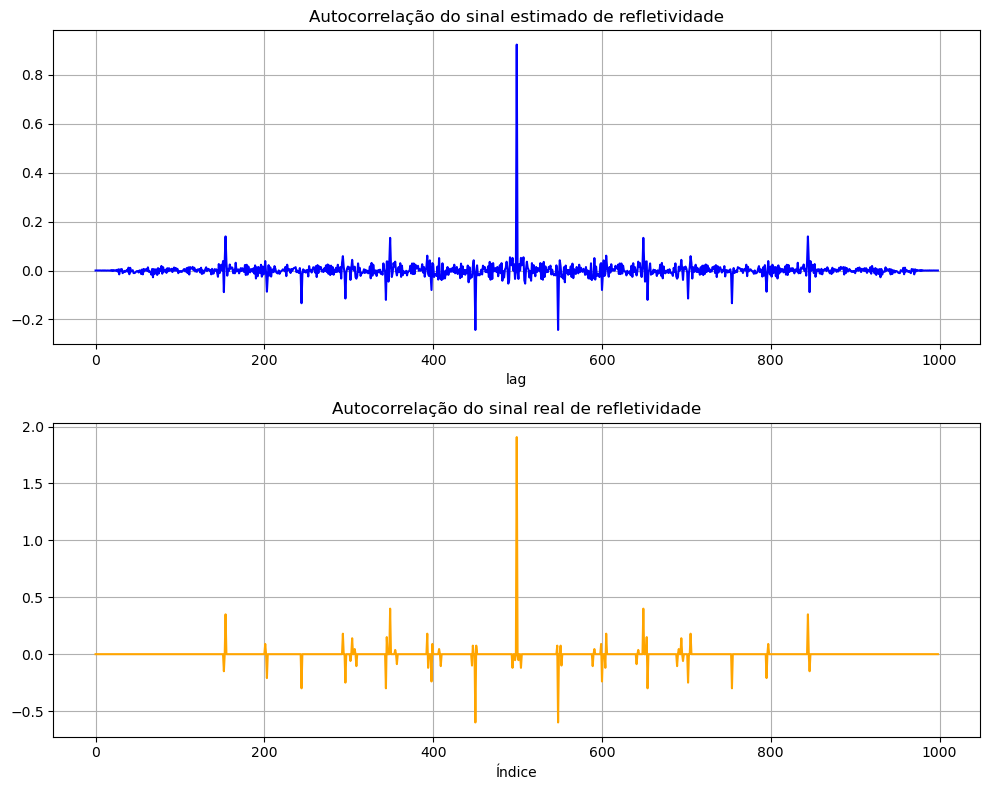

In [73]:
estimate_autocorr = correlate(error_for_k["5"], error_for_k["5"], mode='full')
refletividade_autocorr = correlate(r_true, r_true, mode="full")

# Criando a figura e os eixos para os subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 linhas, 1 coluna

# Primeiro subplot: Estimativa da Refletividade para Filtro com 5 Coeficientes
axs[0].plot(estimate_autocorr, color='blue')  # Plota o erro
axs[0].set_title("Autocorrelação do sinal estimado de refletividade")
axs[0].set_xlabel("lag")
axs[0].grid()

# Segundo subplot: Refletividade Real
axs[1].plot(refletividade_autocorr, color='orange')  # Plota a refletividade real
axs[1].set_title("Autocorrelação do sinal real de refletividade")
axs[1].set_xlabel("Índice")
axs[1].grid()

# Ajustando o layout para não sobrepor os subplots
plt.tight_layout()

# Exibindo o gráfico com ambos os subplots
plt.show()


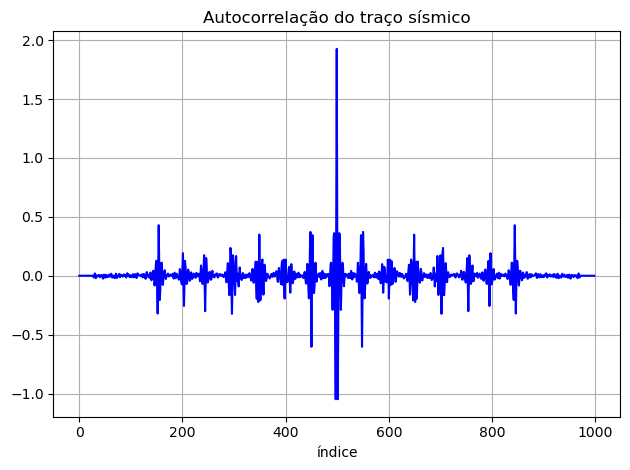

In [82]:
sismograma_autocor = correlate(t, t, mode="full")

# Criando a figura e os eixos para os subplots
# fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 linhas, 1 coluna

# Primeiro subplot: Estimativa da Refletividade para Filtro com 5 Coeficientes
plt.plot(sismograma_autocor, color='blue')  # Plota o erro
plt.title("Autocorrelação do traço sísmico")
plt.xlabel("índice")
plt.grid()

# # Segundo subplot: Refletividade Real
# axs[1].plot(refletividade_autocorr, color='orange')  # Plota a refletividade real
# axs[1].set_title("Autocorrelação do sinal real de refletividade")
# axs[1].set_xlabel("Índice")
# axs[1].grid()

# Ajustando o layout para não sobrepor os subplots
plt.tight_layout()

# Exibindo o gráfico com ambos os subplots
plt.show()